<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/AnaAlonso_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance --upgrade --no-cache-dir

In [3]:
pip install docplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.6/635.6 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for docplex: filename=docplex-2.27.239-py3-none-any.whl size=674503 sha256=ee296b3ecc1fb6a3e7c0411d76153372cfb3555d037490da621be735c8882a99
  Stored in directory: /root/.cache/pip/wheels/62/7c/db/cef9425e1cedbf45621545097eaaeed5efe07005bd8229dd74
Successfully built docplex


In [4]:
pip install CPLEX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 12.5 MB/s eta 0:00:00


Github: yfinance

In [5]:
!pip install pytickersymbols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.43.0
    Uninstalling wheel-0.43.0:
      Successfully uninstalled wheel-0.43.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1


In [6]:
pip install qiskit_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.8 MB/s eta 0:00:00


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
import seaborn as sns
import csv
import yfinance as yf

warnings.filterwarnings("ignore")
plt.style.use('seaborn')

Nos vamos a fjar en el valor de cerrado (Close) para analizar las gráficas.

[*********************100%%**********************]  27 of 27 completed


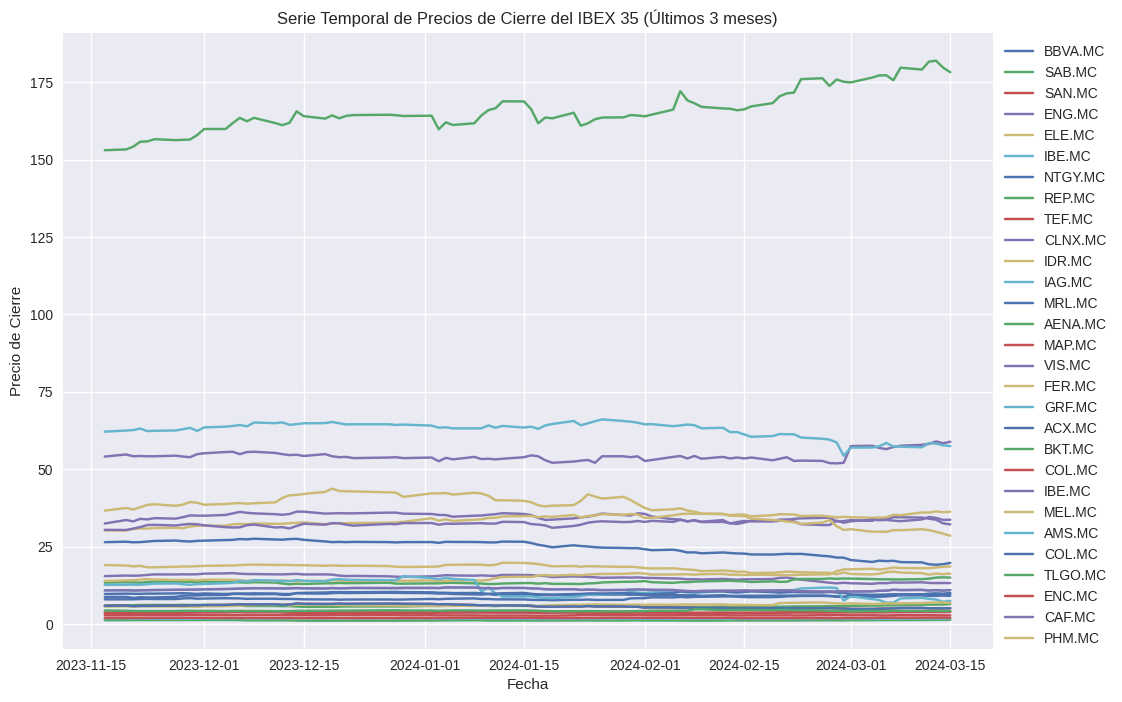

In [8]:
# Lista de símbolos de las acciones del IBEX35
ibex35_symbols = ['BBVA.MC', 'SAB.MC', 'SAN.MC', 'ENG.MC', 'ELE.MC', 'IBE.MC',
                  'NTGY.MC', 'REP.MC', 'TEF.MC', 'CLNX.MC', 'IDR.MC', 'IAG.MC',
                  'MRL.MC', 'AENA.MC', 'MAP.MC', 'VIS.MC', 'FER.MC', 'GRF.MC',
                  'ACX.MC', 'BKT.MC', 'COL.MC', 'IBE.MC', 'MEL.MC', 'AMS.MC',
                  'COL.MC', 'TLGO.MC', 'ENC.MC', 'CAF.MC', 'PHM.MC']

# Fecha de inicio y fin (últimos 3 meses)
end_date = datetime.today() - timedelta(days=30)
start_date = end_date - timedelta(days=120)

# Descargar datos desde Yahoo Finance
ibex35_data = yf.download(ibex35_symbols, start=start_date, end=end_date)['Adj Close']

# Graficar la serie temporal de los precios de cierre
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(ibex35_data.index, ibex35_data[symbol], label=symbol)

plt.title('Serie Temporal de Precios de Cierre del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

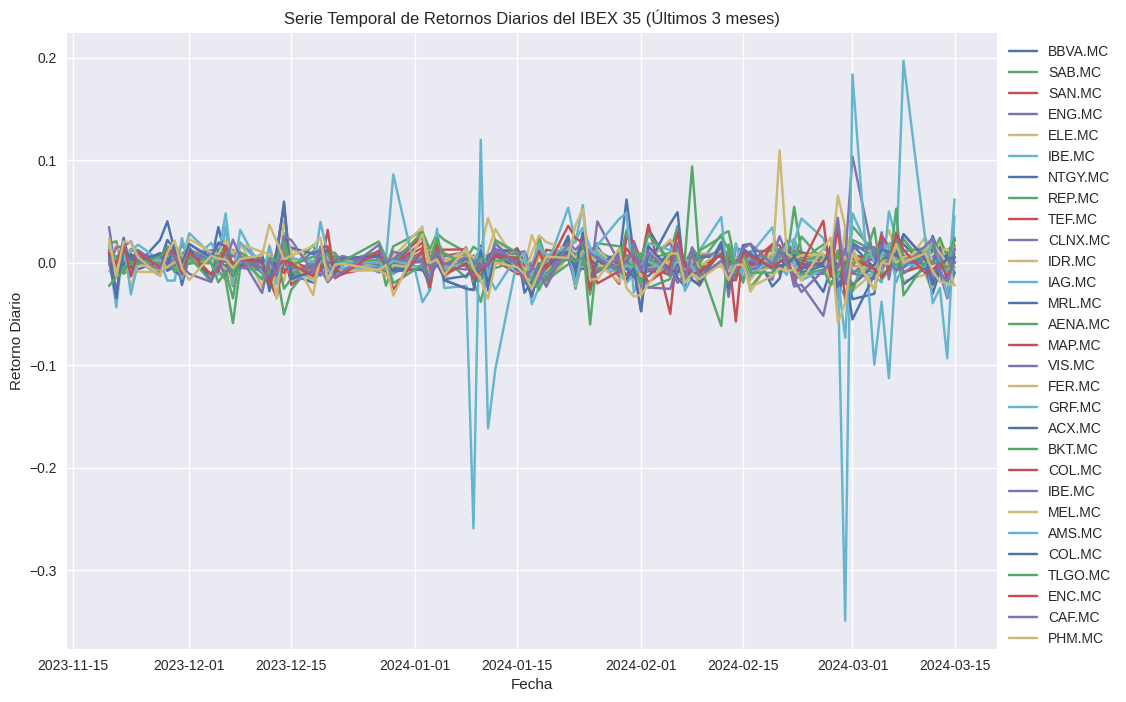

In [9]:
# Calcular los retornos diarios
returns = ibex35_data.pct_change()

# Graficar la serie temporal de los retornos
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(returns.index, returns[symbol], label=symbol)

plt.title('Serie Temporal de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

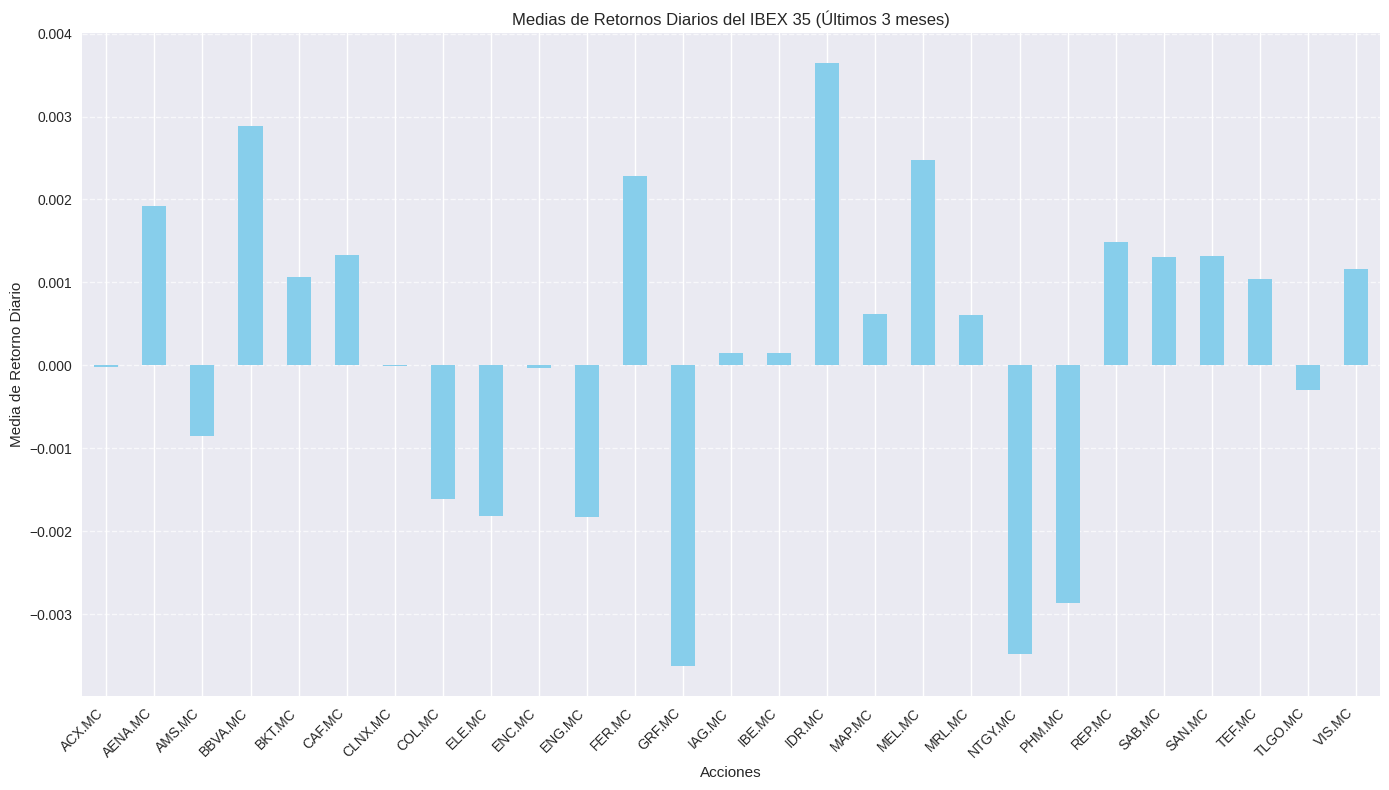

In [10]:
# Calcular la media de los retornos
mean_returns = returns.mean()

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos tanto la media como la varianza en el mismo gráfico de barras.

<Figure size 1400x800 with 0 Axes>

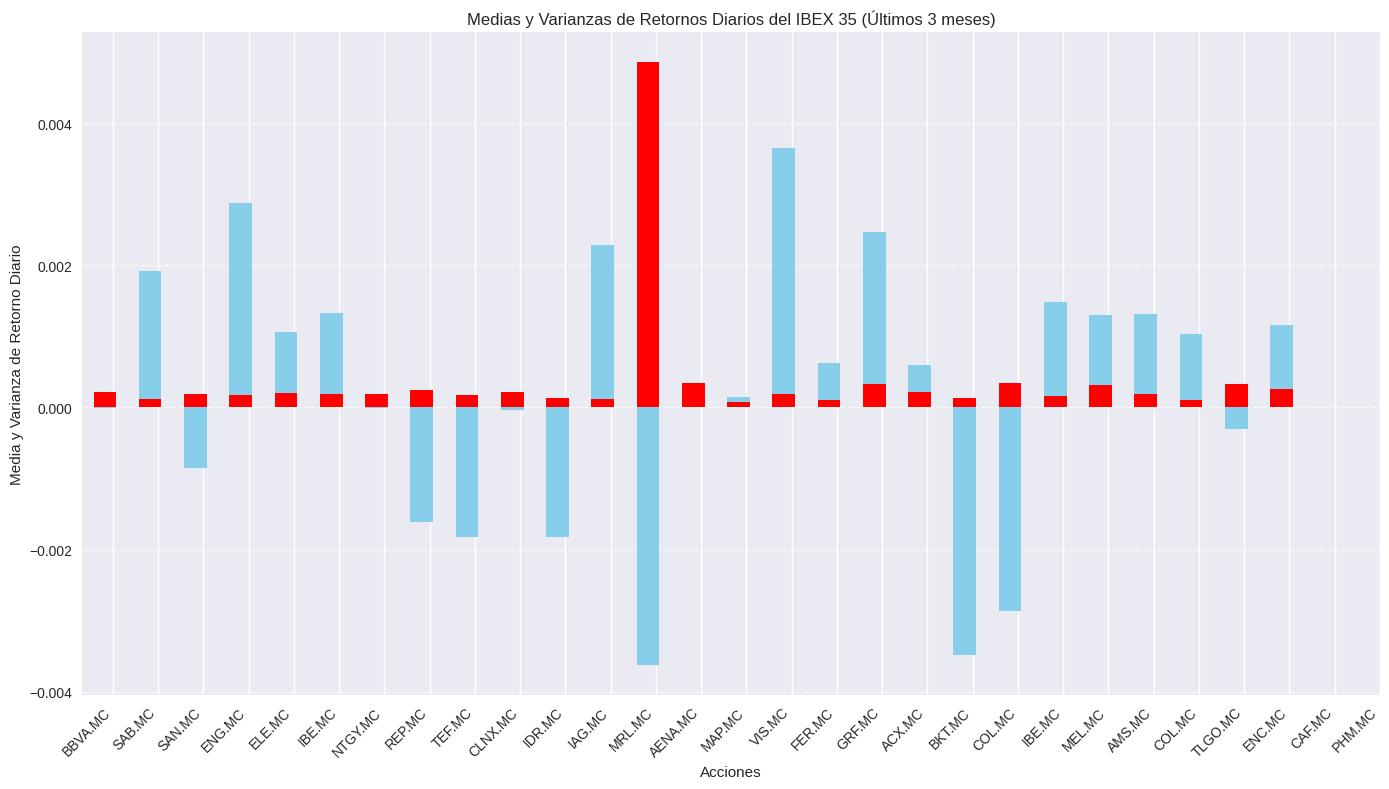

In [11]:
variance_returns = returns.var()

# Graficar el diagrama de barras de las medias y varianzas de los retornos
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(ibex35_symbols))

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

variance_returns.plot(kind='bar', color='red')
plt.title('Medias y Varianzas de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(index + bar_width / 2, ibex35_symbols, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nos interesan aquellas acciones con una media alta y con poda varianza.

A continuación, vemos la misma gráfica pero la varianza en línea.

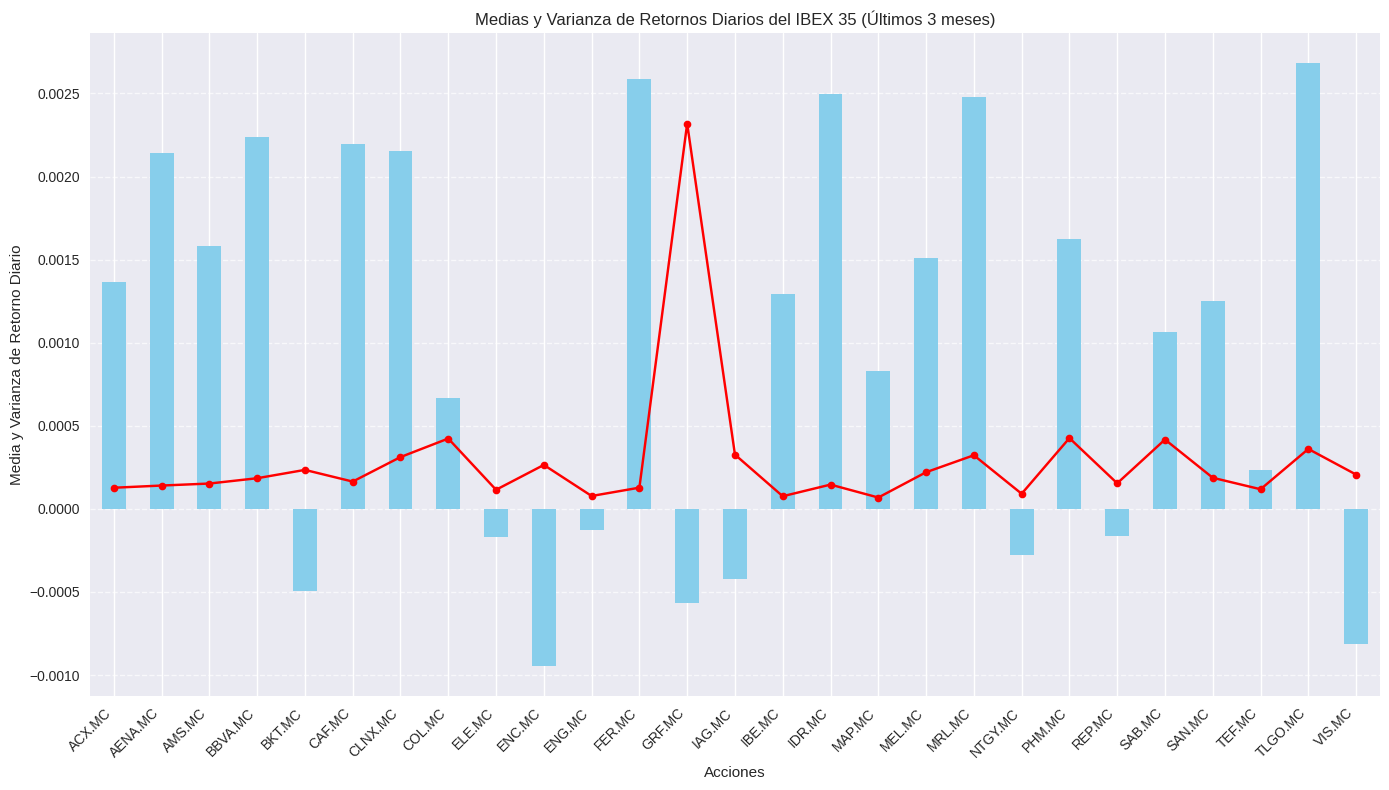

In [ ]:
# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias y Varianza de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.plot(variance_returns, color = 'red', marker = '.', markeredgewidth = 2)

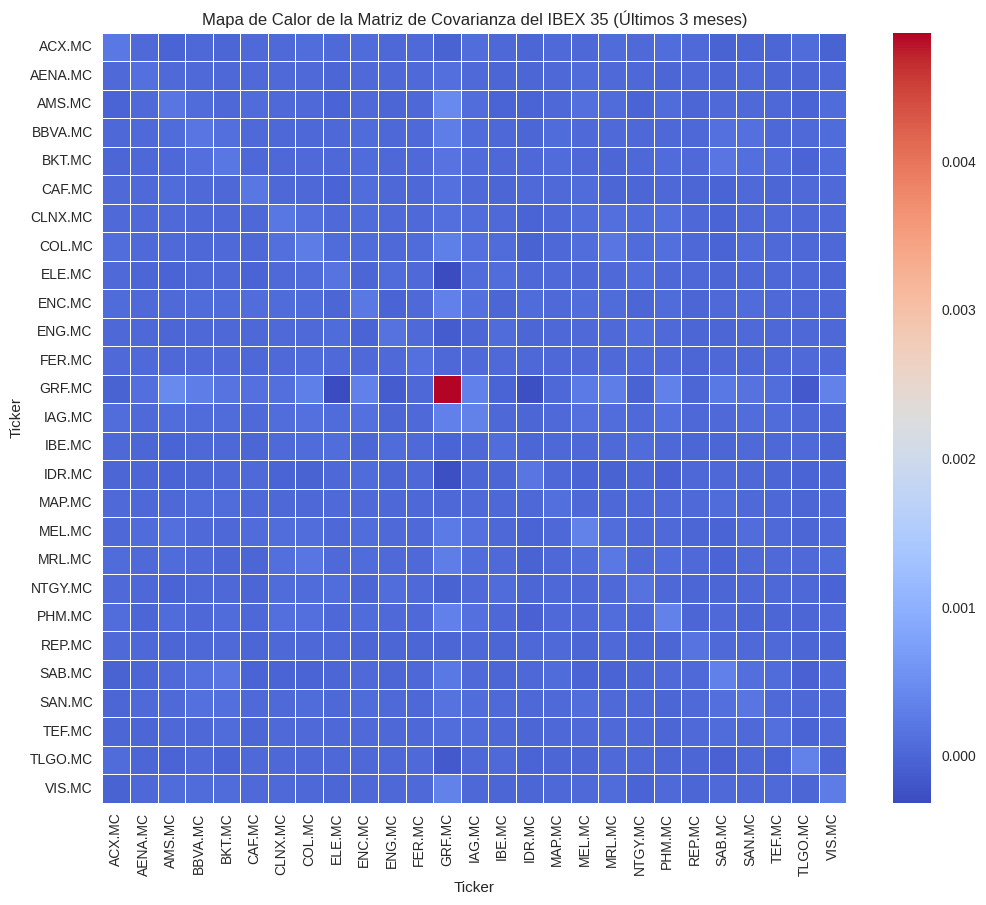

In [12]:
# Calcular la matriz de covarianza
covariance_matrix = returns.cov()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Covarianza del IBEX 35 (Últimos 3 meses)')
plt.show()

In [13]:
# Factor de inversión al riesgo: 0 < q < 1
q = 0.5

from itertools import combinations
vector = [0] * 27
# vector = [0] * 6
combinations_list = list(combinations(range(27), 5))
# combinations_list = list(combinations(range(6), 2))
results_dict = {}

for comb in combinations_list:
  new_vector = vector.copy()
  for index in comb:
    new_vector[index] = 1
    # print(new_vector)
  result_positions = []

  for index in comb:
    new_vector[index] = 1
  result_positions.append([i for i, x in enumerate(new_vector) if x == 1])
  # print(result_positions)

  primer_sumatorio = 0
  segundo_sumatorio = 0

  for i in range(27):
  # for i in range(6):
    primer_sumatorio = primer_sumatorio + new_vector[i]*mean_returns[i]
    for j in range(27):
    # for j in range(6):
      segundo_sumatorio = segundo_sumatorio + new_vector[i]*covariance_matrix.iloc[i,j]*new_vector[j]
  function = primer_sumatorio - q*segundo_sumatorio
  # Save results
  results_dict[comb] = (new_vector, function)

# # Print results dictionary
# for comb, (new_vector, function) in results_dict.items():
#     print(f"Combination: {comb}, New Vector: {new_vector}, Function Result: {function}")

KeyboardInterrupt: 

In [ ]:
max_value = float('-inf')  # Inicializar con un valor muy pequeño
max_index = None
for comb, (new_vector, function) in results_dict.items():
    if function > max_value:
        max_value = function
        max_index = comb

print("Maximum Function Value:", max_value)
print("Index of Maximum Function Value:", max_index)

NameError: name 'results_dict' is not defined

In [ ]:
print('La mejor combinación de acciones para invertir es:')
for index in max_index:
  print(ibex35_symbols[index])

La mejor combinación de acciones para invertir es:
ENG.MC
ACX.MC
COL.MC
MEL.MC
AMS.MC


In [14]:
from docplex.mp.model import Model

In [15]:
# Prepare problem instances
# n = 27
n = 6
q = 0.5
# budget = 5
budget = 2

In [16]:
# Create docplex model
mdl = Model("a")
x = mdl.binary_var_list(range(n), name = "x")
objective = mdl.sum([mean_returns[i]*x[i] for i in range(n)])
objective -= q*mdl.sum([covariance_matrix.iloc[i,j] * x[i] * x[j] for i in range(n) for j in range(n)])
mdl.maximize(objective)
mdl.add_constraint(mdl.sum(x[i] for i in range(n)) <= budget)

docplex.mp.LinearConstraint[](x_0+x_1+x_2+x_3+x_4+x_5,LE,2)

In [17]:
print(mdl.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: a

Maximize
 obj: - 0.000013861301 x_0 + 0.001915704242 x_1 - 0.000854917594 x_2
      + 0.002882733444 x_3 + 0.001064588961 x_4 + 0.001332258522 x_5 + [
      - 0.000214013126 x_0^2 - 0.000093126226 x_0*x_1 + 0.000032120046 x_0*x_2
      - 0.000031065191 x_0*x_3 - 0.000003976834 x_0*x_4 - 0.000090531042 x_0*x_5
      - 0.000111803627 x_1^2 - 0.000075626245 x_1*x_2 - 0.000064557201 x_1*x_3
      - 0.000032517416 x_1*x_4 - 0.000084637547 x_1*x_5 - 0.000185540639 x_2^2
      - 0.000098448390 x_2*x_3 - 0.000055735176 x_2*x_4 - 0.000099394121 x_2*x_5
      - 0.000178533478 x_3^2 - 0.000182702345 x_3*x_4 - 0.000063212033 x_3*x_5
      - 0.000209761388 x_4^2 - 0.000031483175 x_4*x_5 - 0.000192388038 x_5^2 ]/2
Subject To
 c1: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 <= 2

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5
End



In [18]:
sol = mdl.solve()
mdl.print_solution()

objective: 0.005
status: OPTIMAL_SOLUTION(2)
  x_1=1
  x_3=1


In [19]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators.docplex_mp import from_docplex_mp

In [20]:
# load from a Docplex model
mod = from_docplex_mp(mdl)
print(type(mod))
print()
print(mod.prettyprint())

<class 'qiskit_optimization.problems.quadratic_program.QuadraticProgram'>

Problem name: a

Maximize
  -0.00010700656314067534*x_0^2 - 4.65631129116816e-05*x_0*x_1
  + 1.606002292275755e-05*x_0*x_2 - 1.5532595464825837e-05*x_0*x_3
  - 1.9884168935190636e-06*x_0*x_4 - 4.526552092143349e-05*x_0*x_5
  - 5.590181341933561e-05*x_1^2 - 3.7813122401487294e-05*x_1*x_2
  - 3.2278600298353084e-05*x_1*x_3 - 1.625870821650102e-05*x_1*x_4
  - 4.231877342414819e-05*x_1*x_5 - 9.277031971779672e-05*x_2^2
  - 4.9224194890797404e-05*x_2*x_3 - 2.7867587903001644e-05*x_2*x_4
  - 4.969706037330433e-05*x_2*x_5 - 8.926673906873065e-05*x_3^2
  - 9.135117227497311e-05*x_3*x_4 - 3.1606016493316094e-05*x_3*x_5
  - 0.00010488069405149752*x_4^2 - 1.574158760759551e-05*x_4*x_5
  - 9.619401876532083e-05*x_5^2 - 1.3861301324094238e-05*x_0
  + 0.0019157042415494355*x_1 - 0.0008549175937296573*x_2
  + 0.002882733444495739*x_3 + 0.0010645889610359396*x_4
  + 0.0013322585224776677*x_5

Subject to
  Linear constraints (1)

In [21]:
from qiskit_optimization.converters import InequalityToEquality

In [22]:
ineq2eq = InequalityToEquality()
qp_eq = ineq2eq.convert(mod)
print(qp_eq.prettyprint())

Problem name: a

Maximize
  -0.00010700656314067534*x_0^2 - 4.65631129116816e-05*x_0*x_1
  + 1.606002292275755e-05*x_0*x_2 - 1.5532595464825837e-05*x_0*x_3
  - 1.9884168935190636e-06*x_0*x_4 - 4.526552092143349e-05*x_0*x_5
  - 5.590181341933561e-05*x_1^2 - 3.7813122401487294e-05*x_1*x_2
  - 3.2278600298353084e-05*x_1*x_3 - 1.625870821650102e-05*x_1*x_4
  - 4.231877342414819e-05*x_1*x_5 - 9.277031971779672e-05*x_2^2
  - 4.9224194890797404e-05*x_2*x_3 - 2.7867587903001644e-05*x_2*x_4
  - 4.969706037330433e-05*x_2*x_5 - 8.926673906873065e-05*x_3^2
  - 9.135117227497311e-05*x_3*x_4 - 3.1606016493316094e-05*x_3*x_5
  - 0.00010488069405149752*x_4^2 - 1.574158760759551e-05*x_4*x_5
  - 9.619401876532083e-05*x_5^2 - 1.3861301324094238e-05*x_0
  + 0.0019157042415494355*x_1 - 0.0008549175937296573*x_2
  + 0.002882733444495739*x_3 + 0.0010645889610359396*x_4
  + 0.0013322585224776677*x_5

Subject to
  Linear constraints (1)
    c0@int_slack + x_0 + x_1 + x_2 + x_3 + x_4 + x_5 == 2  'c0'

  Integer

In [23]:
from qiskit_optimization.converters import IntegerToBinary

In [24]:
int2bin = IntegerToBinary()
qp_eq_bin = int2bin.convert(qp_eq)
print(qp_eq_bin.prettyprint())

Problem name: a

Maximize
  -0.00010700656314067534*x_0^2 - 4.65631129116816e-05*x_0*x_1
  + 1.606002292275755e-05*x_0*x_2 - 1.5532595464825837e-05*x_0*x_3
  - 1.9884168935190636e-06*x_0*x_4 - 4.526552092143349e-05*x_0*x_5
  - 5.590181341933561e-05*x_1^2 - 3.7813122401487294e-05*x_1*x_2
  - 3.2278600298353084e-05*x_1*x_3 - 1.625870821650102e-05*x_1*x_4
  - 4.231877342414819e-05*x_1*x_5 - 9.277031971779672e-05*x_2^2
  - 4.9224194890797404e-05*x_2*x_3 - 2.7867587903001644e-05*x_2*x_4
  - 4.969706037330433e-05*x_2*x_5 - 8.926673906873065e-05*x_3^2
  - 9.135117227497311e-05*x_3*x_4 - 3.1606016493316094e-05*x_3*x_5
  - 0.00010488069405149752*x_4^2 - 1.574158760759551e-05*x_4*x_5
  - 9.619401876532083e-05*x_5^2 - 1.3861301324094238e-05*x_0
  + 0.0019157042415494355*x_1 - 0.0008549175937296573*x_2
  + 0.002882733444495739*x_3 + 0.0010645889610359396*x_4
  + 0.0013322585224776677*x_5

Subject to
  Linear constraints (1)
    c0@int_slack@0 + c0@int_slack@1 + x_0 + x_1 + x_2 + x_3 + x_4 + x_5
  

In [25]:
from qiskit_optimization.converters import LinearEqualityToPenalty

In [26]:
lineq2penalty = LinearEqualityToPenalty()
qubo = lineq2penalty.convert(qp_eq_bin)
print(qubo.prettyprint())

Problem name: a

Maximize
  -1.0091296507057737*c0@int_slack@0^2
  - 2.0182593014115473*c0@int_slack@0*c0@int_slack@1
  - 1.0091296507057737*c0@int_slack@1^2 - 2.0182593014115473*x_0*c0@int_slack@0
  - 2.0182593014115473*x_0*c0@int_slack@1 - 1.0092366572689144*x_0^2
  - 2.018305864524459*x_0*x_1 - 2.0182432413886247*x_0*x_2
  - 2.018274834007012*x_0*x_3 - 2.018261289828441*x_0*x_4
  - 2.0183045669324686*x_0*x_5 - 2.0182593014115473*x_1*c0@int_slack@0
  - 2.0182593014115473*x_1*c0@int_slack@1 - 1.009185552519193*x_1^2
  - 2.018297114533949*x_1*x_2 - 2.0182915800118457*x_1*x_3
  - 2.018275560119764*x_1*x_4 - 2.0183016201849715*x_1*x_5
  - 2.0182593014115473*x_2*c0@int_slack@0
  - 2.0182593014115473*x_2*c0@int_slack@1 - 1.0092224210254914*x_2^2
  - 2.018308525606438*x_2*x_3 - 2.0182871689994504*x_2*x_4
  - 2.0183089984719205*x_2*x_5 - 2.0182593014115473*x_3*c0@int_slack@0
  - 2.0182593014115473*x_3*c0@int_slack@1 - 1.0092189174448425*x_3^2
  - 2.0183506525838224*x_3*x_4 - 2.01829090742804

https://qiskit-community.github.io/qiskit-optimization/tutorials/03_minimum_eigen_optimizer.html

In [27]:
from qiskit_optimization.translators import to_ising

In [28]:
# convert to Ising Hamiltonian
H, offset = qubo.to_ising()

# The offset number multiplies everything (factor común)
print("offset: {}".format(offset))
print("operator:")
print(H)

offset: 6.052009522783259
operator:
SparsePauliOp(['IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII', 'IIIIZIII', 'IIIZIIII', 'IIZIIIII', 'IZIIIIII', 'ZIIIIIII', 'IIIIIIZZ', 'IIIIIZIZ', 'IIIIZIIZ', 'IIIZIIIZ', 'IIZIIIIZ', 'IZIIIIIZ', 'ZIIIIIIZ', 'IIIIIZZI', 'IIIIZIZI', 'IIIZIIZI', 'IIZIIIZI', 'IZIIIIZI', 'ZIIIIIZI', 'IIIIZZII', 'IIIZIZII', 'IIZIIZII', 'IZIIIZII', 'ZIIIIZII', 'IIIZZIII', 'IIZIZIII', 'IZIIZIII', 'ZIIIZIII', 'IIZZIIII', 'IZIZIIII', 'ZIIZIIII', 'IZZIIIII', 'ZIZIIIII', 'ZZIIIIII'],
              coeffs=[-2.01834306+0.j, -2.01737321+0.j, -2.01877028+0.j, -2.01691757+0.j,
 -2.01781775+0.j, -2.01768743+0.j, -2.0182593 +0.j, -2.0182593 +0.j,
  0.50457647+0.j,  0.50456081+0.j,  0.50456871+0.j,  0.50456532+0.j,
  0.50457614+0.j,  0.50456483+0.j,  0.50456483+0.j,  0.50457428+0.j,
  0.5045729 +0.j,  0.50456889+0.j,  0.50457541+0.j,  0.50456483+0.j,
  0.50456483+0.j,  0.50457713+0.j,  0.50457179+0.j,  0.50457725+0.j,
  0.50456483+0.j,  0.50456483+0.j,  0.50458766+0.j,  0.50457273+0.j,
  0.50456483

In [30]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer

exact_mes = NumPyMinimumEigensolver()
exact = MinimumEigenOptimizer(exact_mes)
exact_result = exact.solve(qubo)
print(exact_result.prettyprint())

objective function value: 0.004620990533259928
variable values: x_0=0.0, x_1=1.0, x_2=0.0, x_3=1.0, x_4=0.0, x_5=0.0, c0@int_slack@0=0.0, c0@int_slack@1=0.0
status: SUCCESS
